In [1]:
%matplotlib inline
from preamble import *

## Supervised Learning
### Classification and Regression

### Generalization, Overfitting, and Underfitting

![model_complexity](images/overfitting_underfitting_cartoon.png)

#### Relation of Model Complexity to Dataset Size

### Supervised Machine Learning Algorithms
#### Some Sample Datasets

X:
[[ 9.963  4.597]
 [11.033 -0.168]
 [11.542  5.211]
 [ 8.693  1.543]
 [ 8.106  4.287]
 [ 8.31   4.806]
 [11.93   4.649]
 [ 9.673 -0.203]
 [ 8.348  5.134]
 [ 8.675  4.476]
 [ 9.177  5.093]
 [10.24   2.455]
 [ 8.689  1.487]
 [ 8.922 -0.64 ]
 [ 9.491  4.332]
 [ 9.257  5.133]
 [ 7.998  4.853]
 [ 8.184  1.296]
 [ 8.734  2.492]
 [ 9.323  5.098]
 [10.064  0.991]
 [ 9.5   -0.264]
 [ 8.345  1.638]
 [ 9.502  1.938]
 [ 9.151  5.498]
 [11.564  1.339]]
X.shape: (26, 2)
y:
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]
y.shape: (26,)


Text(0, 0.5, 'Second feature')

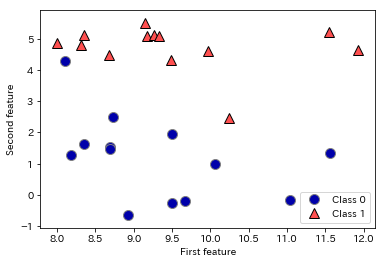

In [2]:
# forgeデータセットの散布図

# generate dataset
X, y = mglearn.datasets.make_forge()
print("X:\n{}".format(X))
print("X.shape:", X.shape)
print("y:\n{}".format(y))
print("y.shape:", y.shape)

"""
Xは、2つの特徴量を持つ26のデータポイント
"""

# plot dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")


X:
[[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [ 2.197]
 [ 0.607]
 [ 1.248]
 [-2.876]
 [ 2.819]
 [ 1.995]
 [-1.726]
 [-1.909]
 [-1.9  ]
 [-1.175]
 [ 0.149]
 [-0.408]
 [-1.253]
 [ 0.671]
 [-2.163]
 [-1.247]
 [-0.802]
 [-0.264]
 [ 1.711]
 [-1.802]
 [ 0.085]
 [ 0.554]
 [-2.721]
 [ 0.645]
 [-1.977]
 [-2.61 ]
 [ 2.693]
 [ 2.794]
 [ 1.85 ]
 [-1.172]
 [-2.414]
 [ 1.105]
 [-0.359]]
X.shape: (40, 1)
y:
[-0.448  0.331  0.779  0.035 -1.388 -2.472 -1.527  1.494  1.     0.23
 -1.06   0.779  0.754 -1.514 -1.673 -0.905  0.084 -0.527 -0.541 -0.341
  0.218 -1.125  0.373  0.098 -0.986  0.967 -1.135  0.698  0.437 -0.957
  0.035 -2.086 -0.474  1.537  0.869  1.877  0.095 -1.415  0.254  0.094]
y.shape: (40,)


Text(0, 0.5, 'Target')

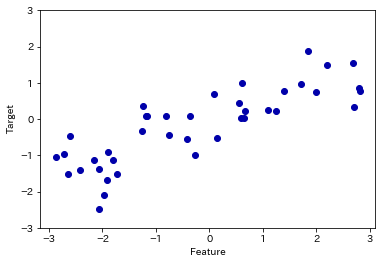

In [3]:
# waveデータセットのプロット。x軸に特徴量を、y軸に回帰ターゲットを取っている

X, y = mglearn.datasets.make_wave(n_samples=40)

print("X:\n{}".format(X))
print("X.shape:", X.shape)
print("y:\n{}".format(y))
print("y.shape:", y.shape)

plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
#　ウィスコンシン乳がんデータセット
# 良性（benign）、悪性(malignant)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer['DESCR'] + "\n...")

"""
**Data Set Characteristics:**
    :Number of Instances: 569
    :Number of Attributes: 30 numeric, predictive attributes and the class
    
30の特徴量を持つ569のデータポイントで構成されている

"""

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

'\n**Data Set Characteristics:**\n    :Number of Instances: 569\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n    \n30の特徴量を持つ569のデータポイントで構成されている\n\n'

In [5]:
# データフレームとして表示：feature_names
pd.DataFrame(cancer.data, columns=cancer.feature_names)

,mean radius,mean texture,mean perimeter,mean area,...,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,...,0.71,0.27,0.46,0.12
1,20.57,17.77,132.90,1326.0,...,0.24,0.19,0.28,0.09
2,19.69,21.25,130.00,1203.0,...,0.45,0.24,0.36,0.09
3,11.42,20.38,77.58,386.1,...,0.69,0.26,0.66,0.17
4,20.29,14.34,135.10,1297.0,...,0.40,0.16,0.24,0.08
5,12.45,15.70,82.57,477.1,...,0.54,0.17,0.40,0.12
6,18.25,19.98,119.60,1040.0,...,0.38,0.19,0.31,0.08
7,13.71,20.83,90.20,577.9,...,0.27,0.16,0.32,0.12
8,13.00,21.82,87.50,519.8,...,0.54,0.21,0.44,0.11
9,12.46,24.04,83.97,475.9,...,1.10,0.22,0.44,0.21


In [6]:
print("Target:\n", cancer['target'])
print("Target names:\n", cancer['target_names'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1

In [7]:
print("cancer.keys():\n", cancer.keys())

cancer.keys():
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [8]:
print("Shape of cancer data:", cancer.data.shape)

Shape of cancer data: (569, 30)


In [9]:
# 569のデータポイントのうち、212が悪性で357が良性である
print("Sample counts per class:\n",
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))})

Sample counts per class:
 {'malignant': 212, 'benign': 357}


In [10]:
print("Feature names:\n", cancer.feature_names)

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [11]:
#　ボストン住宅データセット
# 1970年代のボストン近郊の住宅地の住宅価格の中央値を、犯罪率、チャールズ川からの距離、高速道路への利便性などから予測するものだ
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape:", boston.data.shape)

Data shape: (506, 13)


In [12]:
# 特徴量間の積（交互作用）を見る
# 特徴量エンジニアリング
X, y = mglearn.datasets.load_extended_boston()
print("X.shape:", X.shape)

X.shape: (506, 104)


#### k-Nearest Neighbors
##### k-Neighbors classification

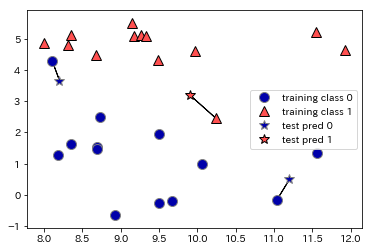

In [13]:
# kNNアルゴリズム k-最近傍法
# 1-最近傍法モデルによるforgeデータセットに対する予測
mglearn.plots.plot_knn_classification(n_neighbors=1)

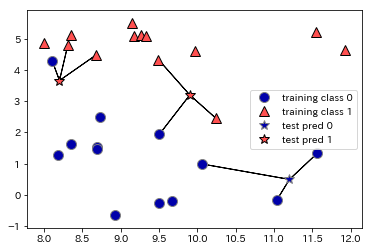

In [14]:
# 3-最近傍法モデルによるforgeデータセットに対する予測
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [15]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [16]:
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)


X_train.shape: (19, 2)
X_test.shape: (7, 2)
y_train.shape: (19,)
y_test.shape: (7,)


In [17]:
# クラスのインポートとインスタンスの作成
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [18]:
# 訓練データを使った学習
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [19]:
# テストデータに対して予測
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [20]:
# モデルの汎化性能の評価
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


##### Analyzing KNeighborsClassifier

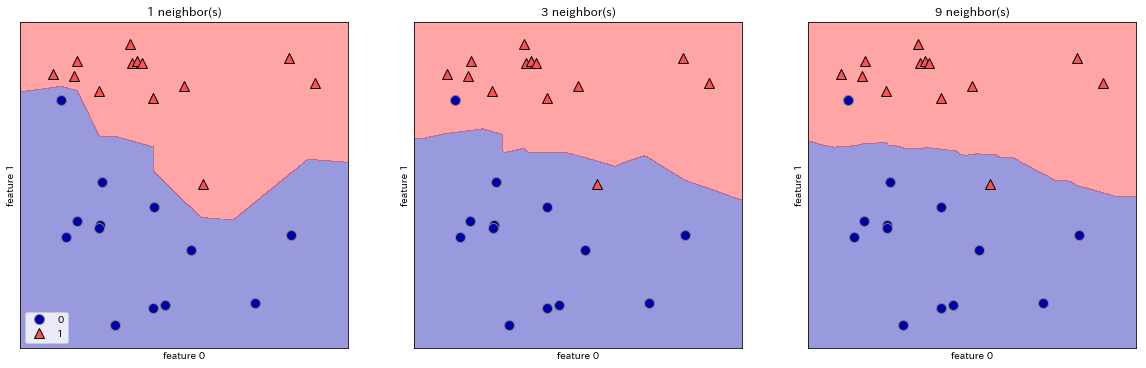

In [21]:
# KNeighborsClassifierの解析
# 決定境界（decision boundary）の描画

# figsize=(X, Y)で図のサイズを決めています。数字はインチ。デフォルトが(8,6)。
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

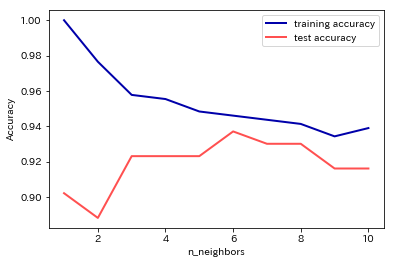

In [22]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

# 訓練セット精度
training_accuracy = []

# テストセット精度
test_accuracy = []

# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    
    # record training set accuracy
    # 訓練セット精度を記録
    training_accuracy.append(clf.score(X_train, y_train))
    
    # record generalization accuracy
    # テストセット精度（汎化精度）を記録
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

##### k-neighbors regression

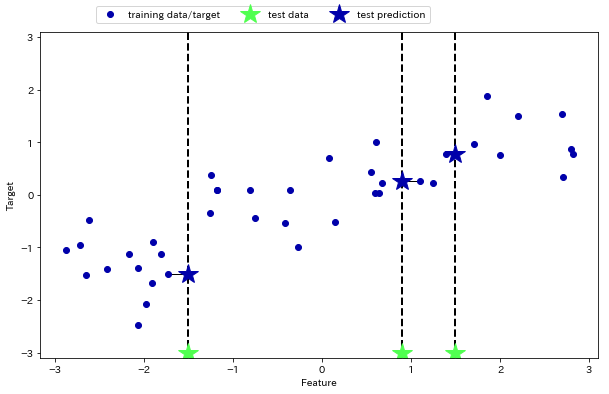

In [23]:
# k-近傍回帰
# 1-最近傍回帰を用いたwaveデータセットでの予測
mglearn.plots.plot_knn_regression(n_neighbors=1)

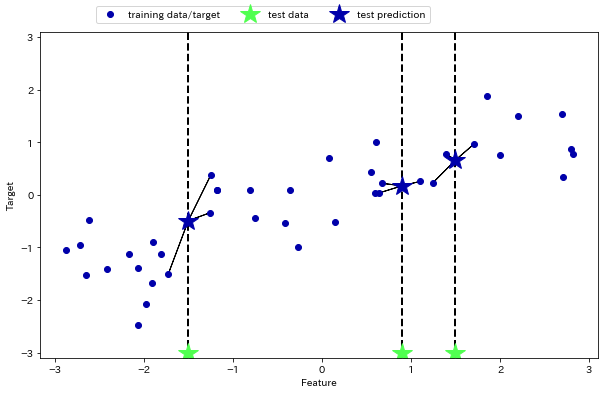

In [24]:
# k-近傍回帰
# 3-最近傍回帰を用いたwaveデータセットでの予測
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [25]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and a test set
# waveデータセットを訓練セットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

# instantiate the model and set the number of neighbors to consider to 3
# 3つの最近傍点を考慮するように設定してモデルのインスタンスを生成
reg = KNeighborsRegressor(n_neighbors=3)

# 訓練データと訓練ターゲットを用いてモデルを学習させる
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

X_train.shape: (30, 1)
X_test.shape: (10, 1)
y_train.shape: (30,)
y_test.shape: (10,)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=3, p=2,
          weights='uniform')

In [26]:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.054  0.357  1.137 -1.894 -1.139 -1.631  0.357  0.912 -0.447 -1.139]


In [27]:
# テストセットの評価。決定係数（coefficient of determination）を返す
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


#### Analyzing KNeighborsRegressor

line.shape: (1000, 1)
line:
 [[-3.   ]
 [-2.994]
 [-2.988]
 [-2.982]
 [-2.976]
 [-2.97 ]
 [-2.964]
 [-2.958]
 [-2.952]
 [-2.946]]


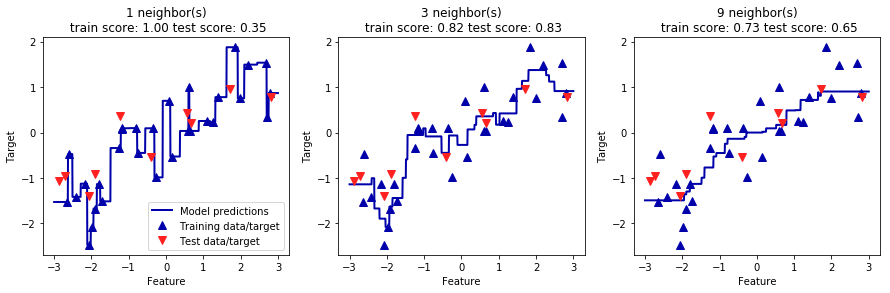

In [31]:
# KNeighborsRegressor の解析

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# -3から3までの間に1000点のデータポイントを創る
# create 1,000 data points, evenly spaced between -3 and 3
# NumPyのnp.linspaceは、線形に等間隔な数列を生成する関数
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
print("line.shape:", line.shape)
print("line:\n", line[:10])

for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

##### k-最近傍法アルゴリズムは理解しやすいという特徴はあるが、処理速度が遅く多数の特徴量を扱うことができないため、実際にはほとんど使われていない。

##### Strengths, weaknesses, and parameters  
##### 線形モデル  

#### Linear Models
##### Linear models for regression
\begin{align*}
\end{align*}

#### 線形モデルによる回帰  
waveデータセットを用いた線形モデルによる予測  


w[0]: 0.393906  b: -0.031804


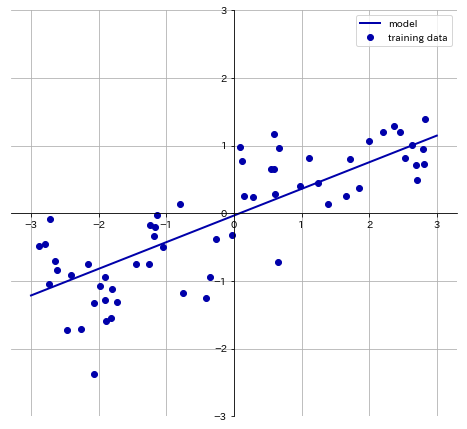

In [29]:
mglearn.plots.plot_linear_regression_wave()

#### Linear regression aka ordinary least squares

In [30]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

print("X:\n", X[:10])
print("y:\n", y[:10])

lr = LinearRegression().fit(X_train, y_train)

X_train.shape: (45, 1)
X_test.shape: (15, 1)
y_train.shape: (45,)
y_test.shape: (15,)
X:
 [[-0.753]
 [ 2.704]
 [ 1.392]
 [ 0.592]
 [-2.064]
 [-2.064]
 [-2.651]
 [ 2.197]
 [ 0.607]
 [ 1.248]]
y:
 [-1.181  0.5    0.138  1.174 -1.32  -2.374 -0.701  1.203  0.293  0.45 ]


In [31]:
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

lr.coef_: [0.394]
lr.intercept_: -0.031804343026759746


In [32]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [33]:
# LinearRegressionが、boston_housingデータセットのような、より複雑なデータセットに対してどのような挙動を示すかを見てみる。

X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

print("X:\n", X[:10])
print("y:\n", y[:10])


lr = LinearRegression().fit(X_train, y_train)

X_train.shape: (379, 104)
X_test.shape: (127, 104)
y_train.shape: (379,)
y_test.shape: (127,)
X:
 [[0.    0.18  0.068 ... 1.    0.09  0.008]
 [0.    0.    0.242 ... 1.    0.204 0.042]
 [0.    0.    0.242 ... 0.98  0.063 0.004]
 ...
 [0.002 0.125 0.272 ... 1.    0.481 0.231]
 [0.002 0.125 0.272 ... 0.949 0.758 0.606]
 [0.002 0.125 0.272 ... 0.949 0.413 0.18 ]]
y:
 [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9]


In [34]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

# 訓練セットとテストセットで性能が大きく異なるのは、過剰適合が起きている明らかな兆候だ。
# したがって、複雑度を制御できるモデルを探さなければならない。

Training set score: 0.95
Test set score: 0.61


##### Ridge regression

In [35]:
# リッジ回帰
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [36]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [37]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


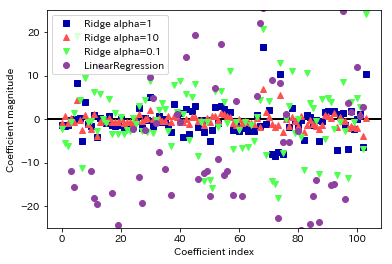

In [38]:
# 様々なalphaによるリッジ回帰と、線形回帰に対する係数の大きさの比較
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()

'\nx軸はcoef_の要素を表している。\nx=0は最初の特徴量に対する係数、\nx=1は、2番目の特徴量に対する係数、\nというようになっており、x=100まで続いている。\ny軸は、特徴量に対応する係数の数値を表している。\nこの図からわかることは、alpha=10では、ほとんどの係数が-3〜3の間にあることだ。\nRidgeモデルのalpha=1ではもう少し広い範囲になる。\nalpha=0.1の点はさらに広い範囲になり、\n正則化されていない線形回帰の場合（alpha=0に対応する）は、さらに広くなっていく。\n'

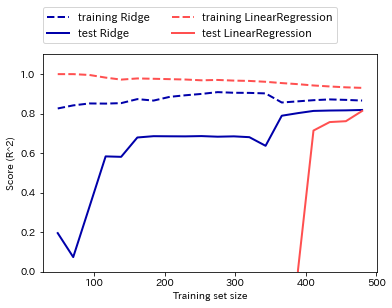

In [40]:
# boston_housingデータセットに対するリッジ回帰と線形回帰の学習曲線
mglearn.plots.plot_ridge_n_samples()

"""
x軸はcoef_の要素を表している。
x=0は最初の特徴量に対する係数、
x=1は、2番目の特徴量に対する係数、
というようになっており、x=100まで続いている。
y軸は、特徴量に対応する係数の数値を表している。
この図からわかることは、alpha=10では、ほとんどの係数が-3〜3の間にあることだ。
Ridgeモデルのalpha=1ではもう少し広い範囲になる。
alpha=0.1の点はさらに広い範囲になり、
正則化されていない線形回帰の場合（alpha=0に対応する）は、さらに広くなっていく。
"""

##### Lasso

In [41]:
# Lasso
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [42]:
# max_iter の値を増やしている。
# こうしないと、モデルが max_iter を増やすように警告を発する
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter.
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [43]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso00001.coef_ != 0))

Training set score: 0.95
Test set score: 0.64
Number of features used: 96


Text(0, 0.5, 'Coefficient magnitude')

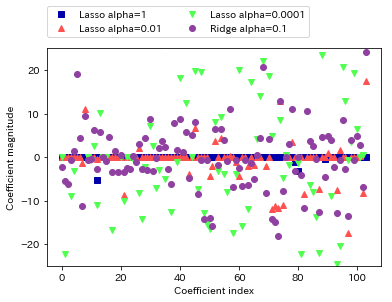

In [44]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")

plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

##### Linear models for classification  
##### クラス分類のための線形モデル  
線形モデルはクラス分類にも多用されている。  
まずは、2クラス分類を見てみよう。

\begin{align*}
\end{align*}

/Users/kaoru/.pyenv/versions/anaconda3-5.3.1/envs/py36_scikit-learn/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kaoru/.pyenv/versions/anaconda3-5.3.1/envs/py36_scikit-learn/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


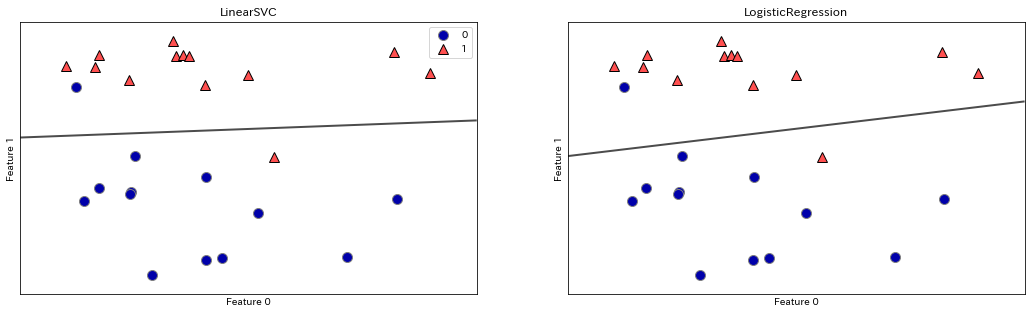

In [45]:
# デフォルトパラメータによる線形SVMとロジスティック回帰によるforgeデータセットの決定境界
# LogisticRegressionモデルとLinearSVCモデルをforgeデータセットに適用して、決定境界を可視化する
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(18, 5))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
                                    ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title(clf.__class__.__name__)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

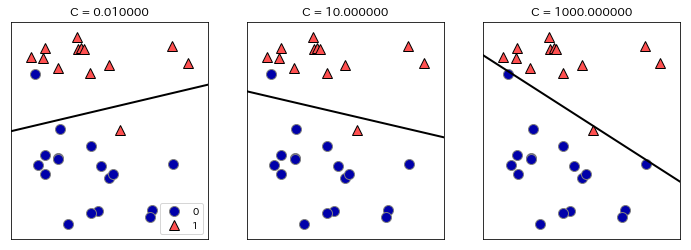

In [46]:
mglearn.plots.plot_linear_svc_regularization()

In [47]:
# LogisticRegression を　cancer データセットを用いてより詳しく解析してみよう

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


/Users/kaoru/.pyenv/versions/anaconda3-5.3.1/envs/py36_scikit-learn/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [48]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


/Users/kaoru/.pyenv/versions/anaconda3-5.3.1/envs/py36_scikit-learn/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


/Users/kaoru/.pyenv/versions/anaconda3-5.3.1/envs/py36_scikit-learn/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


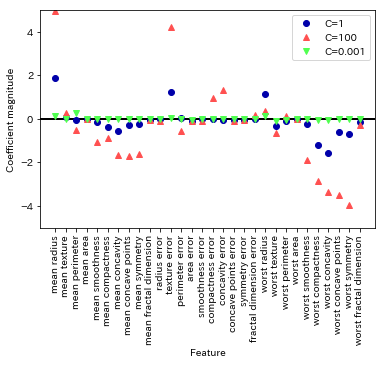

In [50]:
# cancerデータセットを使って異なるCの値に対してロジスティック回帰で学習した際の係数
# どのような係数が、クラス分類に影響を与えているのかを考察する
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

/Users/kaoru/.pyenv/versions/anaconda3-5.3.1/envs/py36_scikit-learn/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kaoru/.pyenv/versions/anaconda3-5.3.1/envs/py36_scikit-learn/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/kaoru/.pyenv/versions/anaconda3-5.3.1/envs/py36_scikit-learn/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/kaoru/.pyenv/versions/anaconda3-5.3.1/envs/py36_scikit-learn/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silen

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


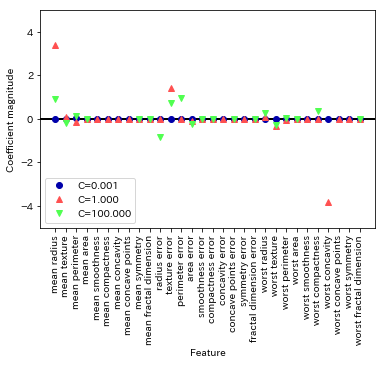

In [51]:
# cancerデータセットを用いて異なるCの値に対してL1ペナルティでロジスティック回帰で学習した際の係数
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)

##### Linear models for multiclass classification
\begin{align*}
\end{align*}

X.shape: (100, 2)
y.shape: (100,)
X:
 [[-7.726 -8.395]
 [ 5.453  0.742]
 [-2.979  9.557]
 [ 6.043  0.571]
 [-6.522 -6.319]
 [ 3.649  1.407]
 [-2.178  9.99 ]
 [ 4.42   2.33 ]
 [ 4.737  2.942]
 [-3.66   9.39 ]]
y:
 [2 1 0 1 2 1 0 1 1 0]


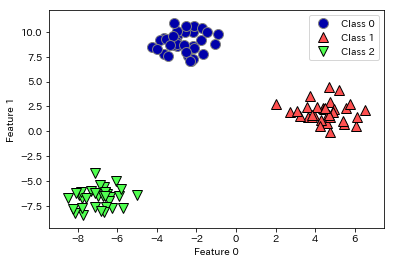

In [52]:
# 3クラスからなる2次元のトイデータセット
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

print("X.shape:", X.shape)
print("y.shape:", y.shape)

print("X:\n", X[:10])
print("y:\n", y[:10])


In [53]:
linear_svm = LinearSVC().fit(X, y)
# 係数配列の形状
print("Coefficient shape: ", linear_svm.coef_.shape)
# 切片配列の形状
print("Intercept shape: ", linear_svm.intercept_.shape)

print("linear_svm.coef_:\n", linear_svm.coef_[:10])
print("linear_svm.intercept_:\n", linear_svm.intercept_[:10])


Coefficient shape:  (3, 2)
Intercept shape:  (3,)
linear_svm.coef_:
 [[-0.175  0.231]
 [ 0.476 -0.069]
 [-0.189 -0.204]]
linear_svm.intercept_:
 [-1.077  0.131 -0.086]


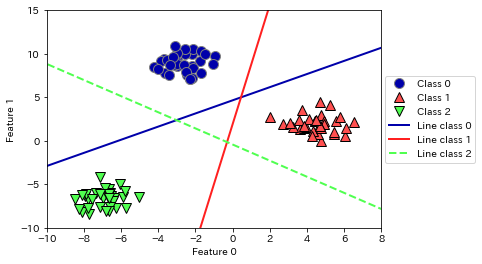

In [54]:
# 3つのクラス分類器による直線を可視化してみる
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))

Text(0, 0.5, 'Feature 1')

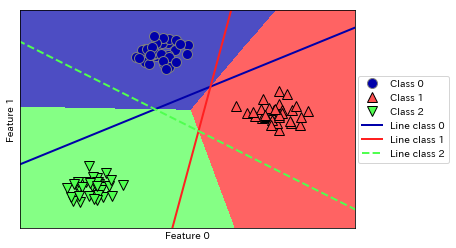

In [55]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Strengths, weaknesses and parameters

In [56]:
# メソッドチェーン
# instantiate model and fit it in one line
logreg = LogisticRegression().fit(X_train, y_train)

/Users/kaoru/.pyenv/versions/anaconda3-5.3.1/envs/py36_scikit-learn/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [57]:
logreg = LogisticRegression()
y_pred = logreg.fit(X_train, y_train).predict(X_test)

/Users/kaoru/.pyenv/versions/anaconda3-5.3.1/envs/py36_scikit-learn/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [58]:
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

/Users/kaoru/.pyenv/versions/anaconda3-5.3.1/envs/py36_scikit-learn/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Naive Bayes Classifiers

In [59]:
# ナイーブベイズクラス分類器
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]])
y = np.array([0, 1, 0, 1])

In [60]:
counts = {}
for label in np.unique(y):
    # iterate over each class
    # count (sum) entries of 1 per feature
    counts[label] = X[y == label].sum(axis=0)
print("Feature counts:\n", counts)

Feature counts:
 {0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


#### Strengths, weaknesses and parameters

### Decision trees

In [63]:
mglearn.plots.plot_animal_tree()

ModuleNotFoundError: No module named 'graphviz'

##### Building decision trees

'\nClass 0 に属するデータ個数は50.\nClass 1 に属するデータ個数は50.\n合計100。\n\n特徴X[1] <= 0.06 で分類したとき、\nTrue が\u300034で、その内訳はClass 0 が2, Class1 が32である。\nFalse が、66で、その内訳はClass 0 が48, Class1 が18である。\n'

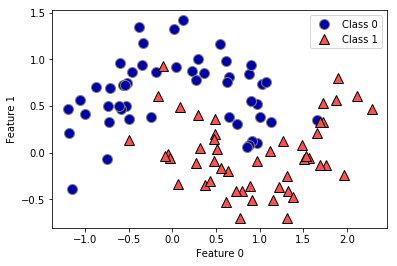

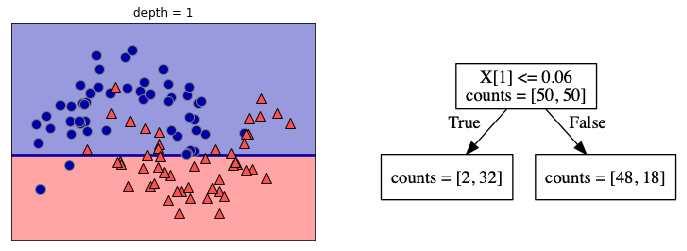

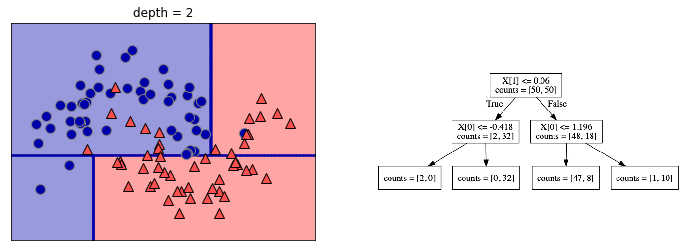

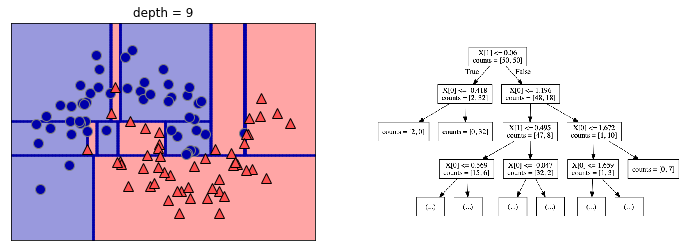

In [67]:
# 決定木の構築に用いるtwo-moonsデータセット
# 75データポイントからなる2つの半月形
mglearn.plots.plot_tree_progressive()

"""
Class 0 に属するデータ個数は50.
Class 1 に属するデータ個数は50.
合計100。

特徴X[1] <= 0.06 で分類したとき、
True が　34で、その内訳はClass 0 が2, Class1 が32である。
False が、66で、その内訳はClass 0 が48, Class1 が18である。
"""

##### Controlling complexity of decision trees

In [68]:
# 決定木の複雑さの制御
# 葉が純粋になるまで分割を続けると、訓練データに対して大幅な過学習が起きる。
# 葉が純粋になっているということは、訓練セットに対しては100%の精度になっているということである。

# cancerデータセットを用いて、事前枝刈り（pre-pruning）の効果を確認

from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [69]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


#### Analyzing Decision Trees

In [70]:
# 決定木の解析
# treeモジュールのexport_graphiz関数を使って木を可視化することができる。
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

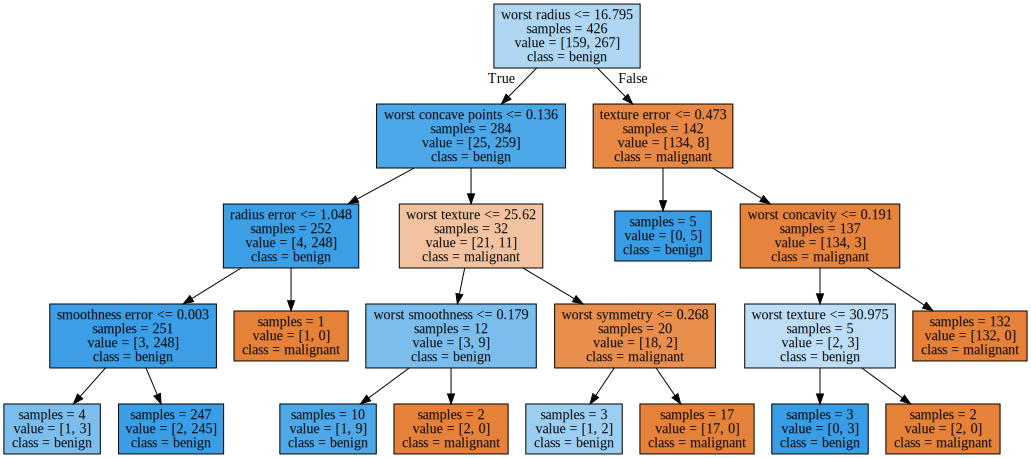

'\nサンプルの合計は426。\nbenign に属するデータ個数は159.\nmalignant に属するデータ個数は267.\n\n\n特徴 worst radius <= 16.795で分類したとき、\nTrue が\u3000284で、その内訳はmalignant が25,benign が259である。\nFalse が、142で、その内訳はbenign が134, benign が8である。\n\n'

In [71]:
# cancerデータセットに対して作られた決定木の可視化
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))


"""
サンプルの合計は426。
benign に属するデータ個数は159.
malignant に属するデータ個数は267.


特徴 worst radius <= 16.795で分類したとき、
True が　284で、その内訳はmalignant が25,benign が259である。
False が、142で、その内訳はbenign が134, benign が8である。

"""


#### Feature Importance in trees

In [72]:
# 決定木の特徴量の重要性
print("Feature importances:")
print(tree.feature_importances_)

Feature importances:
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.048
 0.    0.    0.002 0.    0.    0.    0.    0.    0.727 0.046 0.    0.
 0.014 0.    0.018 0.122 0.012 0.   ]


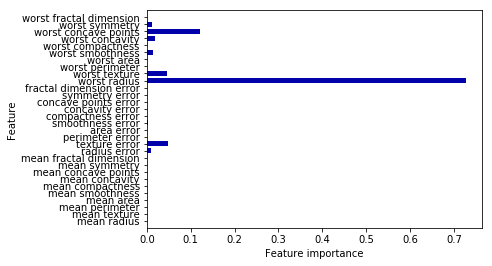

In [73]:
# cancerデータセットから学習した決定木から計算した特徴量の重要度
# 最初の分岐に用いた特徴量「worst radius」が、群を抜いて重要な特徴量だということがわかる。
# これは、決定木を解析した際の、最初のレベルで２つのクラスがかなりきれいに分離できている、という観察結果と一致する。

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


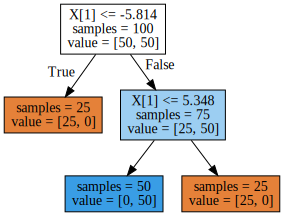

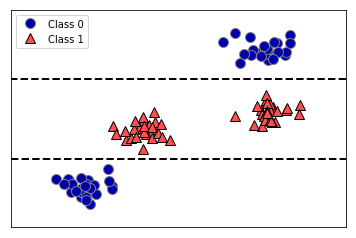

In [74]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

Text(0, 0.5, 'Price in $/Mbyte')

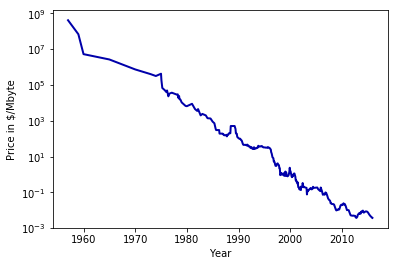

In [75]:
# メモリ（RAM）価格の歴史的推移。対数スケールでプロットされている
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [76]:
ram_prices

,Unnamed: 0,date,price
0,0,1957.00,4.11e+08
1,1,1959.00,6.79e+07
2,2,1960.00,5.24e+06
3,3,1965.00,2.64e+06
4,4,1970.00,7.34e+05
5,5,1973.00,3.99e+05
6,6,1974.00,3.15e+05
7,7,1975.00,4.22e+05
8,8,1975.08,1.80e+05
9,9,1975.25,6.76e+04


In [77]:
# 2000年までのデータを使って、それ以降を予測してみる。
# DecisionTreeRegressorと、LinearRegressionを比較する。

from sklearn.tree import DecisionTreeRegressor
# 過去のデータを使って、2000年以降の価格を予測する
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 日付に基づいて価格を予測
# predict prices based on date
X_train = data_train.date[:, np.newaxis]
# データとターゲットの関係を単純にするために対数変換
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# すべての価格を予想
# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 対数変換をキャンセルするために逆変換
# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

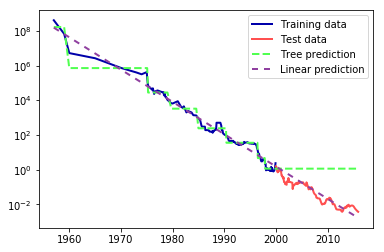

In [78]:
# 決定木モデルと線形回帰モデルの予測結果と、実際のデータを比較している

plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

#### Strengths, weaknesses and parameters

#### Ensembles of Decision Trees
##### Random forests
###### Building random forests
###### Analyzing random forests

In [79]:
# ランダムフォレストの解析
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

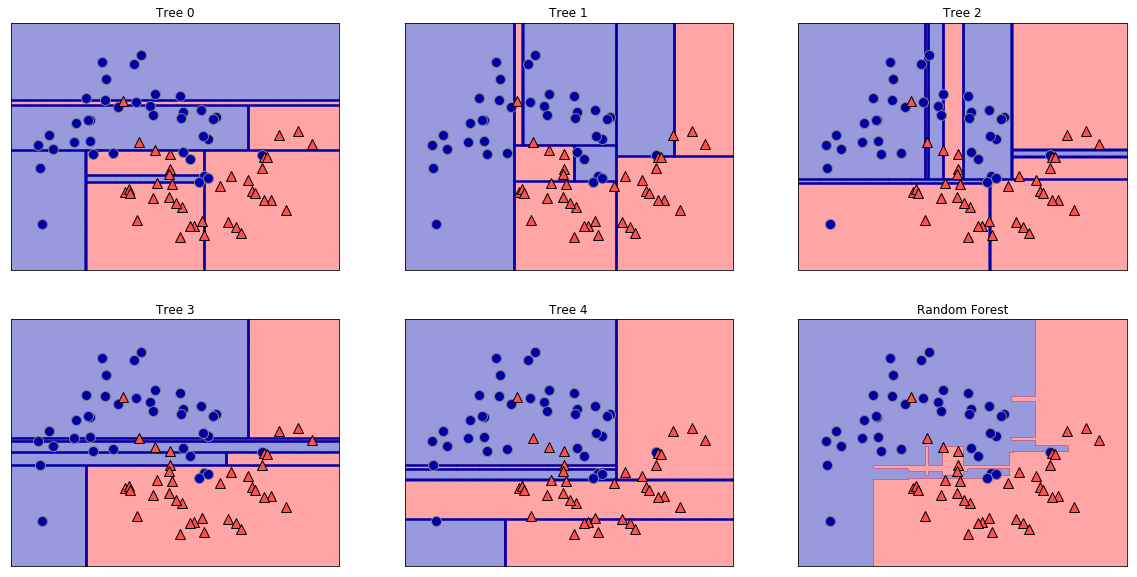

In [80]:
# 5つのランダム化された決定木による決定境界と、それらを平均して得られた決定境界
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [81]:
# cancerデータセットに対して100個の決定木を用いたランダムフォレストを適用
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
# 線形モデルや個別の決定木よりも高い97%の精度を示している。
# ランダムフォレストはデフォルトのパラメータで、十分よく機能する

Accuracy on training set: 1.000
Accuracy on test set: 0.972


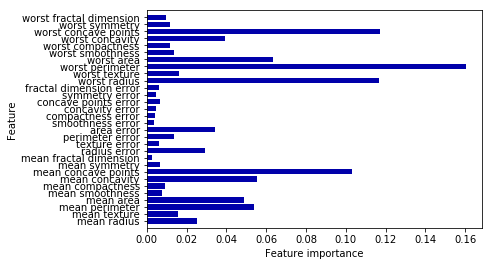

In [82]:
# cancerデータセットを学習したランダムフォレストで算出した特徴量の重要度
plot_feature_importances_cancer(forest)
# ランダムフォレストを構築する際の乱数性によって、アルゴリズムは多くの可能な説明を考慮するようになるので、
# ランダムフォレストの結果は、個々の決定木の結果よりも広い視野で見た全体像を捉えることができる。

###### Strengths, weaknesses, and parameters

#### Gradient Boosted Regression Trees (Gradient Boosting Machines)

In [83]:
# 勾配Boosting回帰木
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


In [84]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [85]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.965


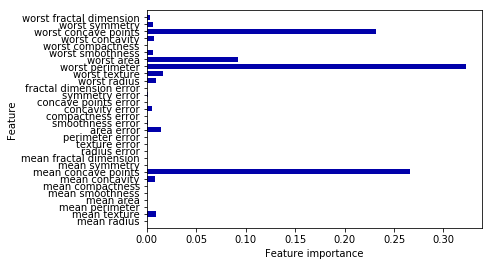

In [86]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

##### Strengths, weaknesses and parameters

#### Kernelized Support Vector Machines
#### Linear Models and Non-linear Features

X.shape: (100, 2)
y.shape: (100,)
X:
 [[ -1.722  -1.48 ]
 [ -3.657  -9.548]
 [  7.078   0.995]
 [ -1.366  -0.315]
 [ -2.665  -3.126]
 [  7.63    8.698]
 [ -5.271 -12.119]
 [  7.918   1.415]
 [ -1.413   0.113]
 [ -1.015  -1.033]]
y:
 [1 0 1 1 1 0 0 1 1 1]


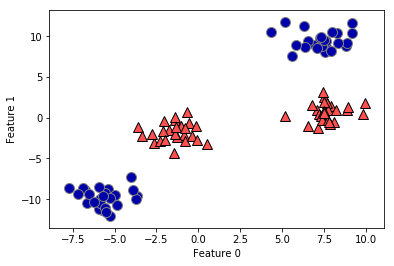

In [87]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

print("X.shape:", X.shape)
print("y.shape:", y.shape)

print("X:\n", X[:10])
print("y:\n", y[:10])


/Users/K.Honda/anaconda3/envs/py35_Keras/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, 'Feature 1')

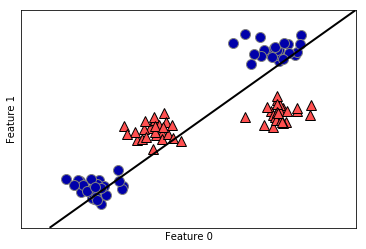

In [88]:
# 線形SVMで見つかった決定境界
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0.5, 0, 'feature1 ** 2')

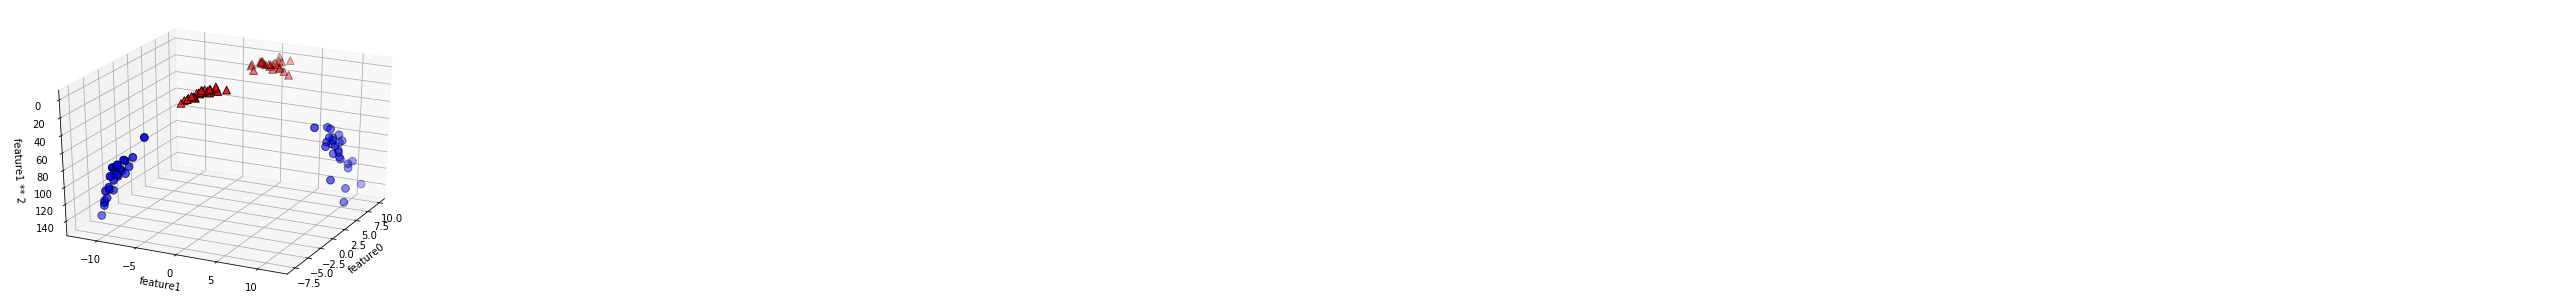

In [89]:
# データセットを拡張したもの。feature1から3番目の特徴量を作っている

# 入力特徴量を拡張。
# たとえば、feature1 ** 2 、つまり2番めの特徴量の２乗を新しい特徴量として加えてみる。
# これで、データポイントは(feature0, feature1, feature1 ** 2)の3次元の点になる。
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

/Users/K.Honda/anaconda3/envs/py35_Keras/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, 'feature1 ** 2')

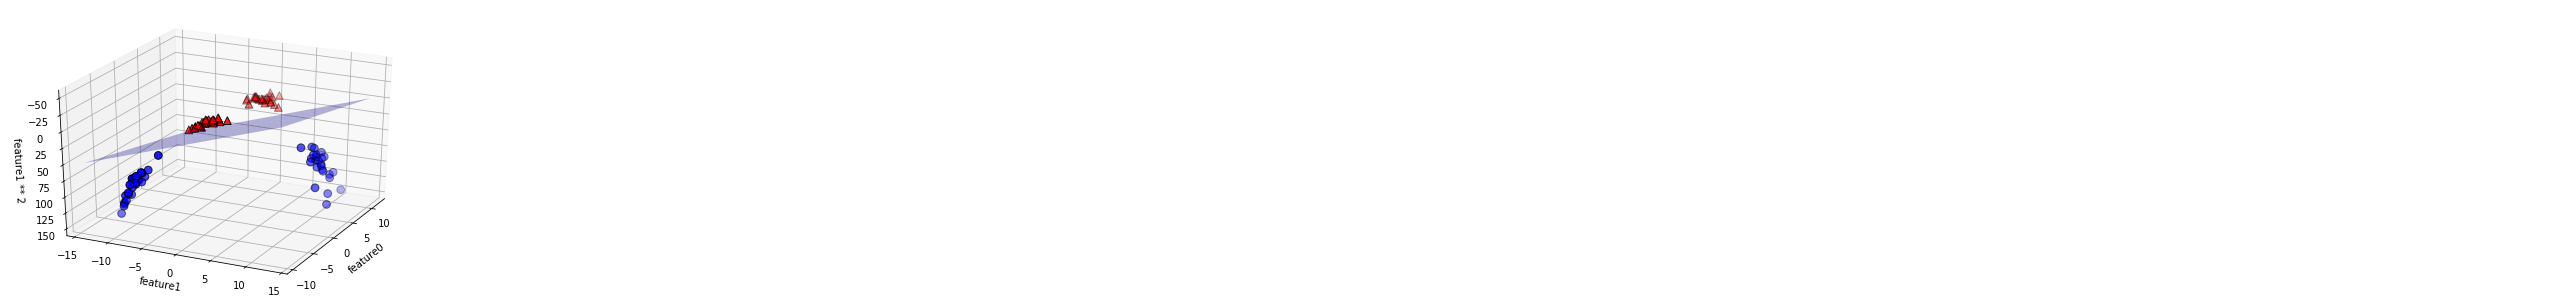

In [90]:
# 拡張された3次元空間で、線形SVMで見つかった決定境界

linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

Text(0, 0.5, 'Feature 1')

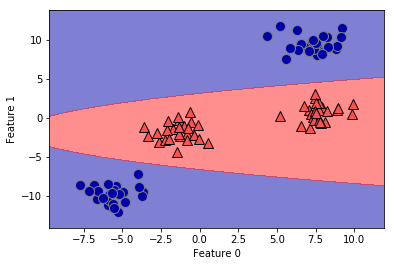

In [91]:
# 前の図の決定境界をもとの２つの特徴量の関数として表示
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### The Kernel Trick
#### Understanding SVMs
\begin{align*}
\end{align*}

Text(0, 0.5, 'Feature 1')

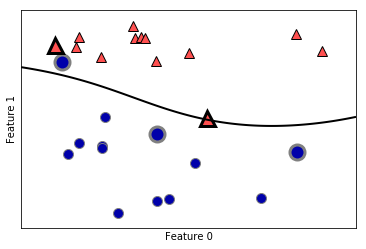

In [92]:
# カーネルトリック
# RBFカーネル法を用いたSVMによる決定境界とサポートベクタ
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#### Tuning SVM parameters

In [ ]:
# SVMパラメータの調整
# 様々なCとgammaに対する決定境界とサポートベクタ

# gammaパラメータは、ガウシアンカーネルの幅を調整する。
# Cパラメータは、線形モデルで用いられたのと同様の正則化パラメータである。
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

In [ ]:
# RBFカーネル法を用いたSVMをcancerデータセットに適用してみる。

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))

In [ ]:
# cancerデータセットの特徴量のレンジ（y軸は対数スケールであることに注意）

plt.boxplot(X_train, manage_xticks=False)
plt.yscale("symlog")
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")

##### Preprocessing data for SVMs

In [ ]:
# 訓練セットの特徴量ごとに最小値を計算
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# 訓練セットの特徴量ごとにレンジ（最大値 - 最小値）を計算
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# 最小値を引いてレンジで割る
# 個々の特徴量は、min = 0, max = 1となる
# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n", X_train_scaled.min(axis=0))
print("Maximum for each feature\n", X_train_scaled.max(axis=0))

In [ ]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training

In [ ]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
        svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

# 訓練セット精度とテストセットがだいたい同じで、100%からは遠いという、適合不足の領域に入っている。

In [ ]:
svc = SVC(C=1000)
svc.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    svc.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test_scaled, y_test)))

# Cを大きくすることで、モデルは大きく改良

#### Strengths, weaknesses and parameters

### Neural Networks (Deep Learning)
#### The Neural Network Model

In [ ]:
display(mglearn.plots.plot_logistic_regression_graph())

In [ ]:
display(mglearn.plots.plot_single_hidden_layer_graph())

In [ ]:
# 活性化関数tanh（双曲正接関数）とrelu（正規化線形関数）

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

In [ ]:
# 2層の隠れ層を持つ多層パーセプトロン
mglearn.plots.plot_two_hidden_layer_graph()

#### Tuning Neural Networks

In [ ]:
# 隠れそうに100ユニットをもつニューラルネットワークによる、two_moonsデータセットの決定境界
# デフォルトでは、MLPは100隠れユニットを用いる
# ニューラルネットワークは、まったく線形ではないが、比較的なめらかな決定境界を学習している。
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
# 隠れ層に10ユニットを持つニューラルネットワークによる、two_moonsデータセットの決定境界
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
# それぞれ10ユニットの隠れ層を２層使う
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                    hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
# それぞれ10ユニットの隠れ層を2層使う。さらに非線形活性化関数にtanhを使う
# using two hidden layers, with 10 units each, now with tanh nonlinearity.
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [ ]:
# さまざまな隠れユニット数とalphaパラメータに対する決定境界

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
print("axes.shape:", axes.shape)
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    # print("\taxx:", axx)
    # n_hidden_nodes は、10, 100 の値をとる
    print("\t n_hidden_nodes:", n_hidden_nodes)
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        # print("\t\t ax:", ax)
        # alpha は、0.0001, 0.01, 0.1, 1の値をとる
        print("\t\t alpha:", alpha)
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
                      n_hidden_nodes, n_hidden_nodes, alpha))

In [ ]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    # print("\t\t ax:", ax)
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

In [ ]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

In [ ]:
# 訓練セットの特徴量ごとの平均値を算出
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# 訓練セットの特徴量ごとの標準偏差を算出
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# 平均を引き、標準偏差の逆数でスケール変換する
# これでmean=0, std=1になる
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train

# まったく同じ変換（訓練データの平均と標準偏差を使って）をテストセットに施す
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

In [ ]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

In [ ]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)

print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

In [ ]:
# cancerデータセットを学習したニューラルネットワークの第一層の重みを表したヒートマップ

plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

#### Strengths, weaknesses and parameters
##### Estimating complexity in neural networks

### Uncertainty estimates from classifiers

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# we rename the classes "blue" and "red" for illustration purposes:
y_named = np.array(["blue", "red"])[y]

# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

#### The Decision Function

In [ ]:
print("X_test.shape:", X_test.shape)
print("Decision function shape:",
      gbrt.decision_function(X_test).shape)

In [ ]:
# show the first few entries of decision_function
print("Decision function:", gbrt.decision_function(X_test)[:6])

In [ ]:
print("Thresholded decision function:\n",
      gbrt.decision_function(X_test) > 0)
print("Predictions:\n", gbrt.predict(X_test))

In [ ]:
# make the boolean True/False into 0 and 1
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions:",
      np.all(pred == gbrt.predict(X_test)))

In [ ]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

#### Predicting Probabilities

In [ ]:
print("Shape of probabilities:", gbrt.predict_proba(X_test).shape)

In [ ]:
# show the first few entries of predict_proba
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test[:6]))

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
cbar.draw_all()
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

![classifier_comparison](images/classifier_comparison.png)

#### Uncertainty in multiclass classification

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=42)

gbrt = GradientBoostingClassifier(learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

In [ ]:
print("Decision function shape:", gbrt.decision_function(X_test).shape)
# plot the first few entries of the decision function
print("Decision function:")
print(gbrt.decision_function(X_test)[:6, :])

In [ ]:
print("Argmax of decision function:")
print(np.argmax(gbrt.decision_function(X_test), axis=1))
print("Predictions:")
print(gbrt.predict(X_test))

In [ ]:
# show the first few entries of predict_proba
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test)[:6])
# show that sums across rows are one
print("Sums:", gbrt.predict_proba(X_test)[:6].sum(axis=1))

In [ ]:
print("Argmax of predicted probabilities:")
print(np.argmax(gbrt.predict_proba(X_test), axis=1))
print("Predictions:")
print(gbrt.predict(X_test))

In [ ]:
logreg = LogisticRegression()

# represent each target by its class name in the iris dataset
named_target = iris.target_names[y_train]
logreg.fit(X_train, named_target)
print("unique classes in training data:", logreg.classes_)
print("predictions:", logreg.predict(X_test)[:10])
argmax_dec_func = np.argmax(logreg.decision_function(X_test), axis=1)
print("argmax of decision function:", argmax_dec_func[:10])
print("argmax combined with classes_:",
      logreg.classes_[argmax_dec_func][:10])

### Summary and Outlook